# Implementation of Sentiments-Analyse-NLP
## 21BCE11373

# workflow
1. imports
2. read the datet
3. import nlp
4. text preprocessing
      removing all unnneccessary
      stemming
      removing the stop words
5. x and y
6. train and test
7. model devlopment via ANN
8. dens
9. save the model


In [1]:
import pandas as pd
import numpy as np

dataset =pd.read_csv("/kaggle/input/r-reviews-nlp-implementation/Restaurant_Reviews.tsv",delimiter ='\t')



In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

ps = PorterStemmer() 


### let's convert all text in lower case

### also it doesn't make sense to train our model fullstops " . " , so let's remove this

In [5]:
data = []
for i in range(0,1000):
    review = dataset["Review"][i]
    review = re.sub('[^a-zA-Z]', ' ',review)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    data.append(review)
    

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2000)
x = cv.fit_transform(data).toarray()

In [7]:
 y = dataset.iloc[:,1:2].values


In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(units = 1565 ,kernel_initializer = "random_uniform",activation = "relu"))
model.add(Dense(units = 3000 ,kernel_initializer = "random_uniform",activation = "relu"))

model.add(Dense(units = 1 ,kernel_initializer = "random_uniform",activation = "sigmoid"))
model.compile(optimizer = "adam",loss = "binary_crossentropy",metrics = ["accuracy"])
model.fit(x_train,y_train,epochs  = 50)

Epoch 1/50
25/25 [==============================] - 3s 87ms/step - loss: 0.5688 - accuracy: 0.7038
Epoch 2/50
25/25 [==============================] - 2s 68ms/step - loss: 0.1468 - accuracy: 0.9475
Epoch 3/50
25/25 [==============================] - 2s 64ms/step - loss: 0.0408 - accuracy: 0.9850
Epoch 4/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0208 - accuracy: 0.9912
Epoch 5/50
25/25 [==============================] - 2s 83ms/step - loss: 0.0169 - accuracy: 0.9962
Epoch 6/50
25/25 [==============================] - 2s 66ms/step - loss: 0.0145 - accuracy: 0.9937
Epoch 7/50
25/25 [==============================] - 2s 69ms/step - loss: 0.0139 - accuracy: 0.9950
Epoch 8/50
25/25 [==============================] - 2s 65ms/step - loss: 0.0180 - accuracy: 0.9950
Epoch 9/50
25/25 [==============================] - 2s 67ms/step - loss: 0.0154 - accuracy: 0.9962
Epoch 10/50
25/25 [==============================] - 2s 68ms/step - loss: 0.0145 - accuracy: 0.9950
Epoch 11/

### accuracy is good 

### let's visualize the training history of neural network using Matplotlib plot

In [13]:
history = model.fit(x_train, y_train, epochs=50)

Epoch 1/50
25/25 [==============================] - 2s 63ms/step - loss: 0.0079 - accuracy: 0.9962
Epoch 2/50
25/25 [==============================] - 2s 70ms/step - loss: 0.0077 - accuracy: 0.9950
Epoch 3/50
25/25 [==============================] - 2s 60ms/step - loss: 0.0078 - accuracy: 0.9962
Epoch 4/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0080 - accuracy: 0.9950
Epoch 5/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0079 - accuracy: 0.9962
Epoch 6/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0087 - accuracy: 0.9950
Epoch 7/50
25/25 [==============================] - 2s 62ms/step - loss: 0.0076 - accuracy: 0.9962
Epoch 8/50
25/25 [==============================] - 2s 61ms/step - loss: 0.0080 - accuracy: 0.9950
Epoch 9/50
25/25 [==============================] - 1s 60ms/step - loss: 0.0078 - accuracy: 0.9950
Epoch 10/50
25/25 [==============================] - 2s 62ms/step - loss: 0.0088 - accuracy: 0.9962
Epoch 11/

7/7 - 0s - loss: 1.4932 - accuracy: 0.7450 - 267ms/epoch - 38ms/step


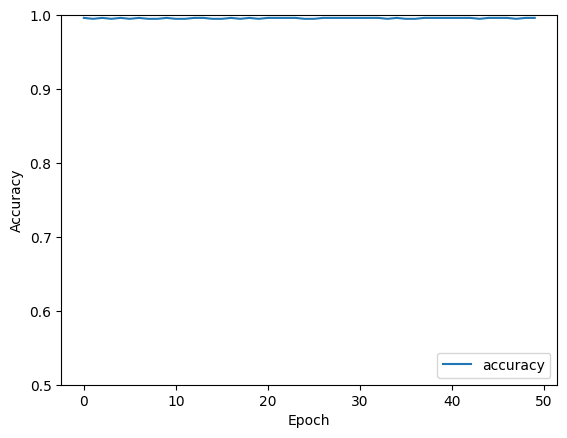

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)


In [16]:
y_pred = model.predict(x_test)

y_pred = (y_pred >0.5)

y_p = model.predict(cv.transform(["good"]))
y_p = y_p>0.5

1/1 [==============================] - 0s 107ms/step


In [17]:
text =  "wow...... it was amazing tasty food"
text = re.sub('[^a-zA-Z]', ' ',text)
text = text.lower()
text = text.split()
text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]
text = ' '.join(text)

y_p1 = model.predict(cv.transform([text]))
y_p1 = y_p>0.5

1/1 [==============================] - 0s 18ms/step


## implementation done